The UnivariateSpline function from scipy fits a cubic spline to data, as we’ve seen before. The following code wraps the function into a scikit-learn Estimator, which can be used like the other estimators we’ve studied. For example, you can execute

  model = Spline(x=10)
  model.fit(...)


import numpy as np
  from scipy.interpolate import UnivariateSpline
  from sklearn.base import BaseEstimator
  from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
  class Spline(BaseEstimator):

    def __init__(self, s=1):
        self.s = s

    def fit(self, X, y):
         
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # store the fitted estimator
        self.X_ = X
        self.y_ = y
        self.spline = UnivariateSpline(X, y, s=self.s)
    
        return self

    def predict(self, X):

        # Check if fit has been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)
    
        return self.spline(X)


Run train-test-split in our “noisy sine curve example” and then run GridSearchCV on Spline on the training data to find the best value of s among (1, 10, 100, 1000, 10000). [To learn more about creating Estimators, see https://scikit-learn.org/stable/developers/develop.html.]

In [12]:
from scipy.interpolate import UnivariateSpline
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
# Generate data



np.random.seed(0)
size = 100

x = np.linspace(-2, 2, 100)
y = 2.9 * np.sin(1.5 * x) + 2*np.random.normal(size=size)


X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=0
)



class Spline(BaseEstimator):

    def __init__(self, s=1):
        self.s = s

    def fit(self, X, y):
    
    # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # store the fitted estimator
        self.X_ = X
        self.y_ = y
        self.spline = UnivariateSpline(X, y, s=self.s)
    
        return self
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)  # Return the negative MSE as a scoring metric

    def predict(self, X):

        # Check if fit has been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)
    
        return self.spline(X)

S = (1,10,100,1000,10000)
cv = GridSearchCV(Spline(),param_grid = {"s": S})

cv.fit(X_train.reshape(-1, 1), y_train)
print(f"best alpha is {cv.best_params_}")
print(f"score on the test data is {cv.score(X_test.reshape(-1, 1), y_test)}")

best alpha is {'s': 1000}
score on the test data is -3.2974235444466578


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Owner\AppData\Local\Temp\ipykernel_19716\3564696679.py", line 50, in score
    return -mean_squared_error(y, y_pred)  # Return the negative MSE as a 

The following generates data in which the target takes the high value (2) in the northeast and southwest quadrants, the low value (0) in the other quadrants, except that it takes the middle value (1) around the origin.

    np.random.seed(0)
    X = pd.DataFrame(
        np.random.normal(size=(1000, 2))
    )
    y = X[0]*X[1]
    y = 1*(y>-0.3) + 1*(y>0.3)

a. Run the following code from the Visualization notebook to see the data. The horizontal and vertical axis labels will be the percentiles of X[0] and X[1] from low to high.

    from scipy.stats import binned_statistic_2d
    import seaborn as sns

    statistic, x_edge, y_edge, binnumber = binned_statistic_2d(
        X[0], X[1], y,
        statistic='mean', 
        bins=[100, 100]
    )

    sns.heatmap(
        statistic.T, 
        cmap='coolwarm',
        cbar=True
    )
    plt.gca().invert_yaxis()
    plt.show()

b. Run GridSearchCV on RandomForestClassifier for max_depths in (4, 6, 8, 10, 12, 16). Report the best max_depth and the score on the test data.




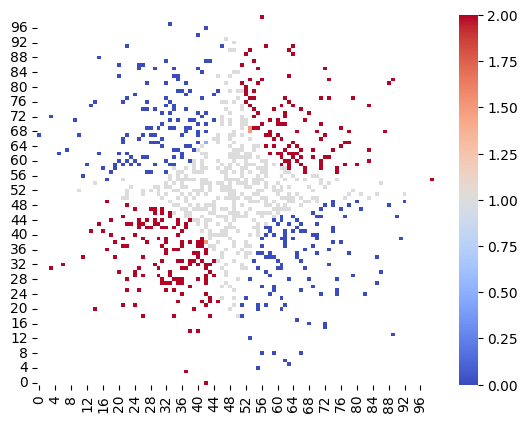

In [15]:
import pandas as pd

np.random.seed(0)
X = pd.DataFrame(
    np.random.normal(size=(1000, 2))
)
y = X[0]*X[1]
y = 1*(y>-0.3) + 1*(y>0.3)

#a. Run the following code from the Visualization notebook to see the data. The horizontal and vertical axis labels will be the percentiles of X[0] and X[1] from low to high.

from scipy.stats import binned_statistic_2d
import seaborn as sns

statistic, x_edge, y_edge, binnumber = binned_statistic_2d(
    X[0], X[1], y,
    statistic='mean', 
    bins=[100, 100]
)

sns.heatmap(
    statistic.T, 
    cmap='coolwarm',
)
plt.gca().invert_yaxis()
plt.show()

Run train-test-split on scikit-learn’s wine dataset. Create pipelines with StandardScaler and (a) LogisticRegression with an penalty, (b) RandomForestClassifier, and (c) MLPClassifier on scikit-learn’s wine dataset. Run GridSearchCV on the pipeline in each case to get some idea of the best hyperparameters. Report (i) the best hyperparameters, (ii) the fraction correct on the test data, and (iii) the confusion matrix for the test data. For MLPClassifier, use

model = MLPClassifier(solver="adam")

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Random Forest
Best Hyperparameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 50}
Test Accuracy: 0.9722222222222222
Classifier: MLP Classifier
Best Hyperparameters: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100,)}
Test Accuracy: 1.0


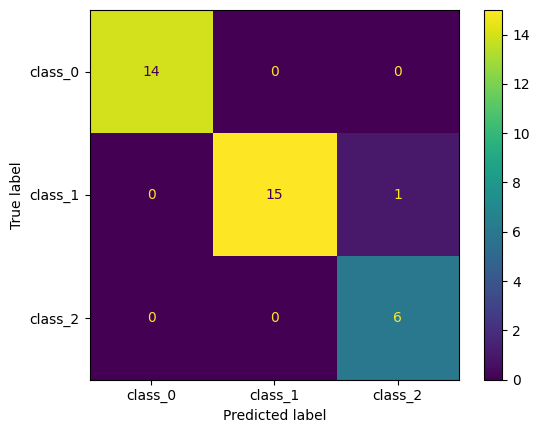

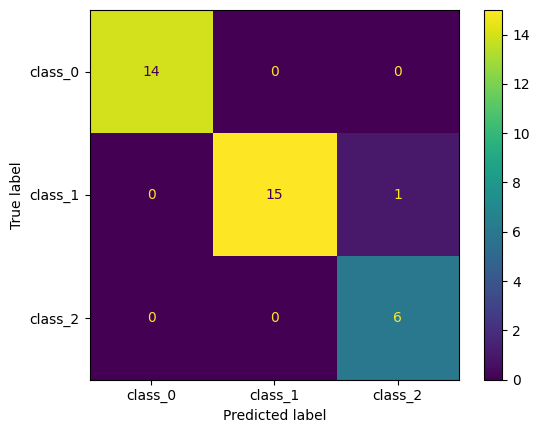

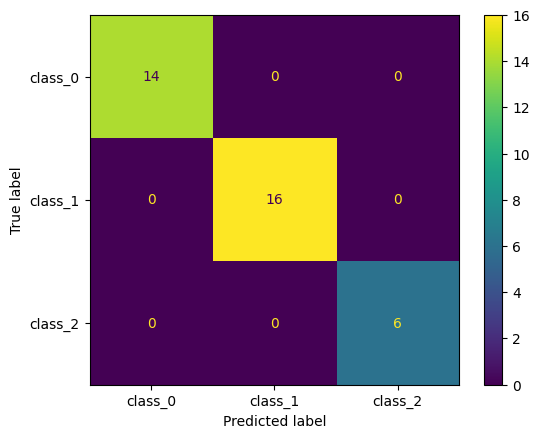

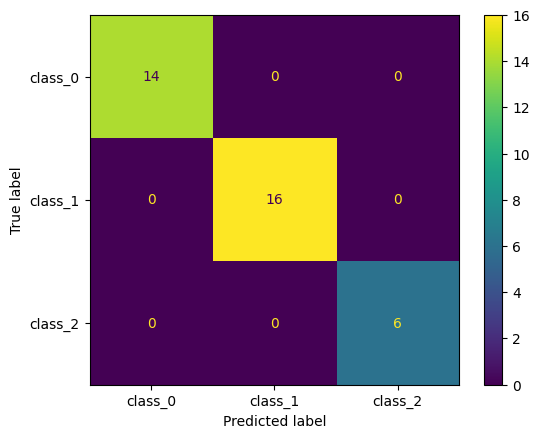

In [26]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create pipelines for different classifiers
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'MLP Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(solver="adam"))
    ])
}

# Define hyperparameters for GridSearchCV for each classifier
param_grids = {
    'Logistic Regression': {
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__C': np.logspace(-4, 4, 10)
    },
    'Random Forest': {
        'classifier__n_estimators': [50],
        'classifier__max_depth': [None, 10, 20, 30],
    },
    'MLP Classifier': {
        'classifier__hidden_layer_sizes': [(100,), (50, 50), (30, 20, 10)],
        'classifier__alpha': [0.0001, 0.001, 0.01],
    }
}

# Initialize dictionaries to store results
best_params = {}
test_accuracies = {}
confusion_matrices = {}

# Loop through each classifier, perform GridSearchCV, and store results
for classifier_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[classifier_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store best hyperparameters
    best_params[classifier_name] = grid_search.best_params_
    
    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[classifier_name] = test_accuracy
    
    ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, display_labels=wine.target_names).plot()
    

# Print results
for classifier_name in pipelines.keys():
    print(f"Classifier: {classifier_name}")
    print(f"Best Hyperparameters: {best_params[classifier_name]}")
    print(f"Test Accuracy: {test_accuracies[classifier_name]}")
